In [104]:
import pandas as pd
import numpy as np

In [105]:
train = pd.read_csv("Mobile Price Classification/train.csv")

In [106]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [107]:
test = pd.read_csv("Mobile Price Classification/test.csv")
test = test.drop("id" , axis = 1)

In [108]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Variables


##### id-ID
##### battery_power-Total energy a battery can store in one time measured in mAh
##### blue-Has bluetooth or not
##### clock_speed-speed at which microprocessor executes instructions
##### dual_sim-Has dual sim support or not
##### fc-Front Camera mega pixels
##### four_g-Has 4G or not
##### int_memory-Internal Memory in Gigabytes
##### m_dep-Mobile Depth in cm
##### mobile_wt-Weight of mobile phone
##### n_cores-Number of cores of processor
##### pc-Primary Camera mega pixels
##### px_height-Pixel Resolution Height
##### px_width-Pixel Resolution Width
##### ram-Random Access Memory in Megabytes
##### sc_h-Screen Height of mobile in cm
##### sc_w-Screen Width of mobile in cm
##### talk_time-longest time that a single battery charge will last when you are
##### three_g-Has 3G or not
##### touch_screen-Has touch screen or not
##### wifi-Has wifi or not

In [109]:
# For those whose prince range is not given we will remove the data.
train = train.dropna(subset = ["price_range"])

In [110]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Now lets check out the null values present in each column

In [111]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [112]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [113]:
# Thankfully there is no null values present in the data frame.

#### Since we have a lot of features to choose from. We must check how the features relate to each other and how they individually influence the price range.

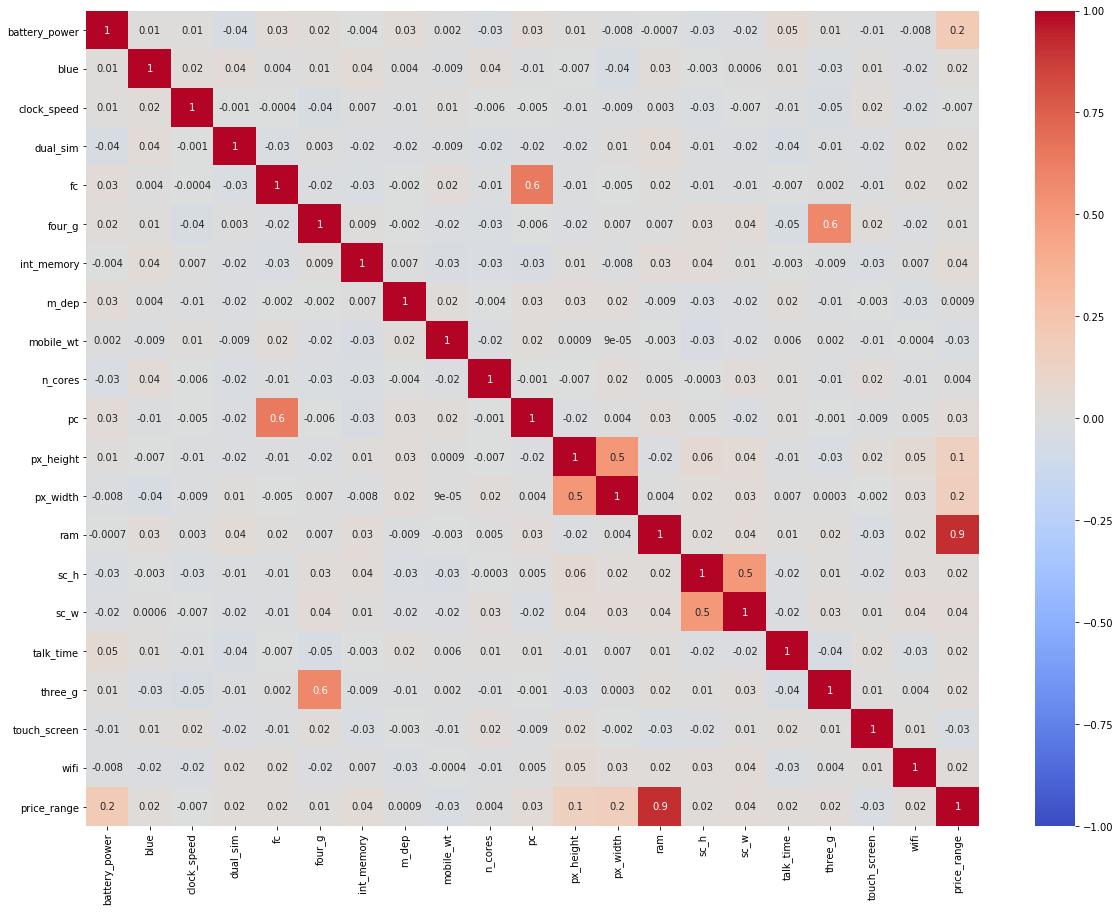

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_data = train.corr()
plt.subplots(figsize = (20,15))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True, fmt = ".1g",vmin = -1,vmax = 1,center = 0,cmap = "coolwarm")

### Major takeaways from the plot would be 
#### 1. RAM Highly influences the prince range.
#### 2. Front Camera and Back Camera are also correlated hence one of them could be dropped. 

# Try 1 - No Variable Dropped. All used in the pipeline.

In [166]:
X = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
Y = train["price_range"]

#### 1.Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


#### 2. Support Vector Machine

In [167]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.98


#### 3. Decision Trees

In [120]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [121]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.75


In [122]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [123]:
y_pred = clf_entropy.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_entropy.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.75


# Try 2 - Dropping front camera attributes.

In [124]:
X = train[['battery_power', 'blue', 'clock_speed', 'dual_sim','four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
Y = train["price_range"]

#### 1. Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


#### 2. Support Vector Machine

In [127]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.97


#### 3. Decision trees

In [129]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [130]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.75


# Try 3 - Using a feature selector technique

### 1. Correlation Statistics

In [147]:
from sklearn.feature_selection import f_regression

In [148]:
var_rel = f_regression(X,Y,center = True)

In [149]:
var_rel

(array([8.38779617e+01, 8.45996225e-01, 8.71868382e-02, 6.08196172e-01,
        9.67342566e-01, 4.36065661e-01, 3.95278694e+00, 1.45388827e-03,
        1.83629285e+00, 3.86692787e-02, 2.25811734e+00, 4.52760795e+01,
        5.64890895e+01, 1.05658950e+04, 1.05622046e+00, 2.99862160e+00,
        9.55121243e-01, 1.11448546e+00, 1.84952743e+00, 7.05281458e-01]),
 array([1.26485424e-19, 3.57798490e-01, 7.67815123e-01, 4.35560163e-01,
        3.25462912e-01, 5.09103653e-01, 4.69300624e-02, 9.69587932e-01,
        1.75539251e-01, 8.44125308e-01, 1.33073589e-01, 2.22780613e-11,
        8.47896880e-14, 0.00000000e+00, 3.04203195e-01, 8.34897420e-02,
        3.28537459e-01, 2.91236616e-01, 1.73991799e-01, 4.01115194e-01]))

### 2. Selection Method

In [150]:
from sklearn.feature_selection import SelectKBest

In [153]:
K_Best_Features = SelectKBest(f_regression , k = 5)

In [154]:
K_Best_Features

SelectKBest(k=5, score_func=<function f_regression at 0x00000181B88CF9D8>)

In [155]:
train_new = K_Best_Features.fit_transform(X,Y)

In [156]:
train_new.shape

(2000, 5)

In [158]:
X_new = train_new

### Now Lets Use our classifiers again

#### 1. Logistic regression

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


#### 2. Support Vector Machine

In [162]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [163]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.95


#### 3. Decision tree

In [164]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [165]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.75


# Major Takeaways from above Analysis :

### 1. All features are equally important hence no feature selection techniques are used.
### 2. Support Vector Machine is the best classifier on this data with an accuracy of above 98 percent.

## Classification using SVM without Feature selection and removal.

In [169]:
predicted_values = clf.predict(test)

In [170]:
predicted_values

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [171]:
test["price_range"] = pd.DataFrame(predicted_values)

In [172]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


## Saving the final test file with the predicted price range column to a new csv file

In [173]:
test.to_csv("Mobile Price Classification/Predicted.csv")